In [1]:
import pandas as pd
import numpy as np
import math
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException, ElementClickInterceptedException

In [2]:
columns = ['Note_ID', 'Grade', 'Rate_%', 'Effective_Rate_%', 'Term', 'PD_%', 'Funding', 'Funded_%']
df = pd.DataFrame(None,columns = columns)

In [3]:
url = 'https://p2p.fundaztic.com/loaninfo/openHistoryLoan.htm'
driver = webdriver.Chrome('/Users/weeliptan/Desktop/chromedriver')
driver.get(url)
time.sleep(5)

In [4]:
page_element = driver.find_elements_by_xpath("//*[@class='l_page']")
total_pages = math.ceil(int(page_element[0].text.split()[6]) / 10)

In [5]:
i = 0
while True:
    table_elements = driver.find_elements_by_xpath("//*[@id='loaninfotr']")
    for element in table_elements:
        word_list = element.text.split()
        word_list[3] = word_list[3].replace('%','')
        word_list[-1] = word_list[-1].replace('%','')
        word_list[1] = word_list[1] + word_list[2]
        word_list.pop(2), word_list.pop(5)
        array = np.array(word_list)
        word_list_df = pd.DataFrame(array.reshape(1,-1), columns = df.columns)
        df = df.append(word_list_df, ignore_index=True)

    try:
        next_link = driver.find_elements_by_xpath("//*[@id='bot_next_page']")
        next_link[-1].click()
        i += 1
        print ('Pages scrapped:', i)
        time.sleep(2)

    except (NoSuchElementException, StaleElementReferenceException, ElementClickInterceptedException):
        i += 1
        print ('Pages scrapped:', i)
        print ('Completed')
        break

driver.quit()

Pages scrapped: 1
Pages scrapped: 2
Pages scrapped: 3
Pages scrapped: 4
Pages scrapped: 5
Pages scrapped: 6
Pages scrapped: 7
Pages scrapped: 8
Pages scrapped: 9
Pages scrapped: 10
Pages scrapped: 11
Pages scrapped: 12
Pages scrapped: 13
Pages scrapped: 14
Pages scrapped: 15
Pages scrapped: 16
Pages scrapped: 17
Pages scrapped: 18
Pages scrapped: 19
Pages scrapped: 20
Pages scrapped: 21
Pages scrapped: 22
Pages scrapped: 23
Pages scrapped: 24
Pages scrapped: 25
Pages scrapped: 26
Pages scrapped: 27
Pages scrapped: 28
Pages scrapped: 29
Pages scrapped: 30
Pages scrapped: 31
Pages scrapped: 32
Pages scrapped: 33
Pages scrapped: 34
Pages scrapped: 35
Pages scrapped: 36
Pages scrapped: 37
Pages scrapped: 38
Pages scrapped: 39
Pages scrapped: 40
Pages scrapped: 41
Pages scrapped: 42
Pages scrapped: 43
Pages scrapped: 44
Pages scrapped: 45
Pages scrapped: 46
Pages scrapped: 47
Pages scrapped: 48
Pages scrapped: 49
Pages scrapped: 50
Pages scrapped: 51
Pages scrapped: 52
Pages scrapped: 53
Pa

In [6]:
df.shape[0] == df.Note_ID.nunique()

True

In [7]:
df.to_csv('Latest_Scrapped_P2P_Notes.csv')

In [8]:
df.head()

,Note_ID,Grade,Rate_%,Effective_Rate_%,Term,PD_%,Funding,Funded_%
0,1111,D7,10.73,19.13,36,7.14,"100,000.00",100.00
1,1110,A1,9.78,17.55,36,2.49,"70,000.00",100.00
2,1109,A1,9.78,17.55,36,2.03,"70,000.00",100.00
3,1108,D7,11.43,20.27,36,6.18,"100,000.00",100.00
4,1107,D7,11.43,20.27,36,8.42,"70,000.00",100.00


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [10]:
df = pd.read_csv('Latest_Scrapped_P2P_Notes.csv', index_col=0)

In [11]:
df.head()

,Note_ID,Grade,Rate_%,Effective_Rate_%,Term,PD_%,Funding,Funded_%
0,1111,D7,10.73,19.13,36,7.14,"100,000.00",100.0
1,1110,A1,9.78,17.55,36,2.49,"70,000.00",100.0
2,1109,A1,9.78,17.55,36,2.03,"70,000.00",100.0
3,1108,D7,11.43,20.27,36,6.18,"100,000.00",100.0
4,1107,D7,11.43,20.27,36,8.42,"70,000.00",100.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 964
Data columns (total 8 columns):
Note_ID             965 non-null int64
Grade               965 non-null object
Rate_%              965 non-null float64
Effective_Rate_%    965 non-null float64
Term                965 non-null int64
PD_%                965 non-null float64
Funding             965 non-null object
Funded_%            965 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 67.9+ KB


In [13]:
df.Funding = df.Funding.apply(lambda x: x.replace(",", ''))
df.Funding = df.Funding.astype('float64')

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Grade = le.fit_transform(df.Grade) + 1

/Users/weeliptan/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


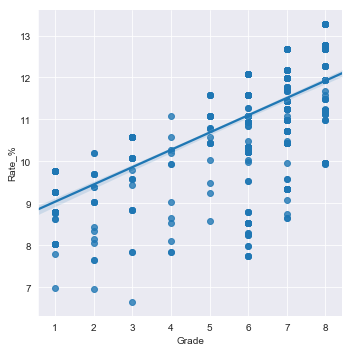

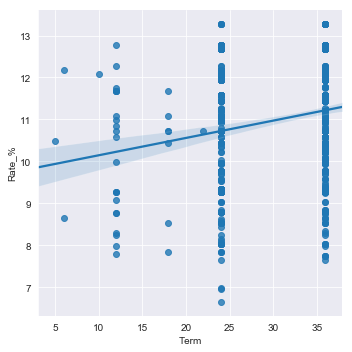

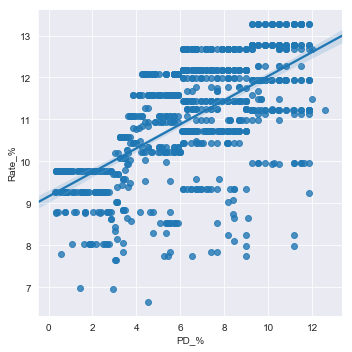

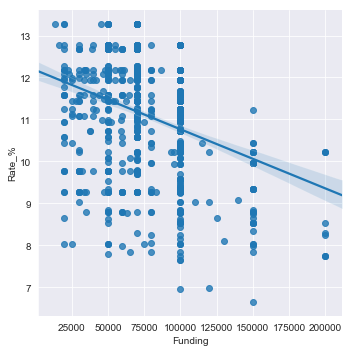

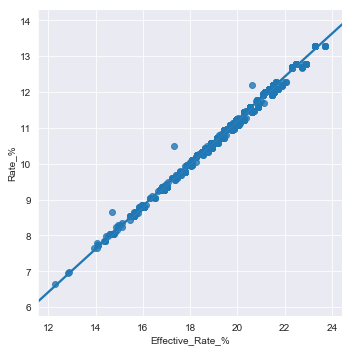

In [15]:
for i in ['Grade', 'Term', 'PD_%', 'Funding', 'Effective_Rate_%']:
    sns.lmplot(i, 'Rate_%', df)
    plt.show()

In [16]:
rows_to_drop = df[df['Funded_%'] < 100].index
df.drop(rows_to_drop, axis = 0, inplace = True)

In [17]:
X = df.drop(['Note_ID', 'Rate_%', 'Effective_Rate_%', 'Funded_%'], axis = 1)
y = df['Rate_%']

In [18]:
X.corr()

,Grade,Term,PD_%,Funding
Grade,1.000000,0.015425,0.893979,0.049622
Term,0.015425,1.000000,0.010267,0.086118
PD_%,0.893979,0.010267,1.000000,0.012619
Funding,0.049622,0.086118,0.012619,1.000000


In [19]:
X = X.drop('Grade', axis = 1)

# Basic Regression Model

In [20]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [21]:
final = OLS(y, add_constant(X)).fit()

In [22]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rate_%   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     362.7
Date:                Sun, 09 Feb 2020   Prob (F-statistic):          9.46e-151
Time:                        15:49:53   Log-Likelihood:                -1106.8
No. Observations:                 839   AIC:                             2222.
Df Residuals:                     835   BIC:                             2241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9273      0.179     49.799      0.000       8.575       9.279
Term           0.0435      0.005      9.233      0.000       0.034       0.053
PD_%           0.3073      0.011     28.408      0.000       0.286       0.329
Funding    -1.613e-05   1.08e-06    -14.916      0.000   -1.82e-05    -1.4e-05
==============================================================================
Omnibus:                       38.623   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.904
Skew:                          -0.526   Prob(JB):                     4.83e-10
Kurtosis:                       3.346   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
def predict(x):
    subset = x[['Term', 'PD_%', 'Funding']].values
    add_constant = np.append([1], subset)
    prediction = final.predict(add_constant)
    return round(prediction[0], 2)

def invest_decision(x):
    if x['Delta_%'] >= 1.00:
        return 'Yes'
    else:
        return 'No'

In [24]:
df['Predicted_Rate_%'] = df.apply(predict, axis = 1)
df['Delta_%'] = df['Rate_%'] - df['Predicted_Rate_%']
df['Invest'] = df.apply(invest_decision, axis = 1)

In [25]:
df.head()

,Note_ID,Grade,Rate_%,Effective_Rate_%,Term,PD_%,Funding,Funded_%,Predicted_Rate_%,Delta_%,Invest
0,1111,7,10.73,19.13,36,7.14,100000.0,100.0,11.08,-0.35,No
1,1110,1,9.78,17.55,36,2.49,70000.0,100.0,10.13,-0.35,No
2,1109,1,9.78,17.55,36,2.03,70000.0,100.0,9.99,-0.21,No
3,1108,7,11.43,20.27,36,6.18,100000.0,100.0,10.78,0.65,No
4,1107,7,11.43,20.27,36,8.42,70000.0,100.0,11.95,-0.52,No


In [26]:
yes_invest = df[df.Invest == 'Yes'].drop('Invest', axis = 1).reset_index(drop = True)
yes_invest.head()

,Note_ID,Grade,Rate_%,Effective_Rate_%,Term,PD_%,Funding,Funded_%,Predicted_Rate_%,Delta_%
0,1097,7,12.19,21.51,36,7.41,100000.0,100.0,11.16,1.03
1,1096,7,12.19,21.51,36,6.95,100000.0,100.0,11.02,1.17
2,1093,8,12.78,22.46,36,9.25,100000.0,100.0,11.72,1.06
3,1086,6,12.08,21.33,36,5.01,70000.0,100.0,10.91,1.17
4,1075,7,12.69,22.31,36,7.41,70000.0,100.0,11.64,1.05


# Construct Recommendation Engine using Cosine Similarity

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
mm = MinMaxScaler()
yes_invest_scaled = mm.fit_transform(yes_invest.iloc[:, 1:])

In [29]:
test = pd.concat([yes_invest.Note_ID, pd.DataFrame(yes_invest_scaled, columns = yes_invest.columns[1:])], axis = 1)

In [30]:
chosen_id = 742
chosen_array = df[df.Note_ID == chosen_id].iloc[:, 1:10].values[0]
chosen_array

array([5.000e+00, 1.043e+01, 1.863e+01, 3.600e+01, 3.850e+00, 1.500e+05,
       1.000e+02, 9.260e+00, 1.170e+00])

In [31]:
def cosine(x):
    b = x[['Grade', 'Rate_%', 'Effective_Rate_%', 'Term', 'PD_%','Funding', 'Funded_%', 'Predicted_Rate_%', 'Delta_%']].values
    
    dot = np.dot(chosen_array, b)
    norm_chosen = np.linalg.norm(chosen_array)
    norm_b = np.linalg.norm(b)
    cos = dot / (norm_chosen * norm_b)
    
    return cos

In [32]:
test['Cosine'] = test.apply(cosine, axis = 1)

In [33]:
recommendation_id = test.sort_values(by = 'Cosine', ascending = False)[1:6]['Note_ID'].values
recommendation_id

array([388, 698, 946, 742, 151])

In [34]:
df[df.Note_ID.isin(recommendation_id)]

,Note_ID,Grade,Rate_%,Effective_Rate_%,Term,PD_%,Funding,Funded_%,Predicted_Rate_%,Delta_%,Invest
139,946,5,10.43,18.90,24,3.72,150000.0,100.0,8.70,1.73,Yes
297,742,5,10.43,18.63,36,3.85,150000.0,100.0,9.26,1.17,Yes
334,698,6,10.23,18.55,24,5.35,150000.0,100.0,9.20,1.03,Yes
580,388,6,10.23,18.30,36,4.99,200000.0,100.0,8.80,1.43,Yes
814,151,5,10.79,19.51,24,3.85,100000.0,100.0,9.54,1.25,Yes
